<a href="https://colab.research.google.com/github/sumanu9400/Machine_learning/blob/main/IPL_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("/content/ipl2025.csv")

# Basic stats
print(df.describe())  # Numeric columns (runs, wickets, etc.)
print(df['winner'].value_counts())  # Team-wise wins
print(df['toss_decision'].value_counts())  # Toss preference

       match_id  win_by_runs  win_by_wickets  total_runs  total_wickets
count  10.00000    10.000000       10.000000   10.000000      10.000000
mean    5.50000    11.500000        2.500000  181.800000       6.300000
std     3.02765    13.492796        2.838231   18.855002       1.888562
min     1.00000     0.000000        0.000000  155.000000       3.000000
25%     3.25000     0.000000        0.000000  169.000000       5.250000
50%     5.50000     6.000000        1.500000  180.000000       6.500000
75%     7.75000    21.000000        4.750000  196.000000       7.750000
max    10.00000    35.000000        7.000000  210.000000       9.000000
winner
Mumbai Indians                 2
Gujarat Titans                 2
Delhi Capitals                 1
Kolkata Knight Riders          1
Rajasthan Royals               1
Chennai Super Kings            1
Punjab Kings                   1
Royal Challengers Bangalore    1
Name: count, dtype: int64
toss_decision
bat      6
field    4
Name: count, dtype:

In [ ]:
# Top 3 teams by wins
top_teams = df['winner'].value_counts().head(3)

# Average runs scored per team (when they are team1 or team2)
team_runs = df.groupby('team1')['total_runs'].mean().sort_values(ascending=False)

# Win percentage when winning toss
df['toss_win_equals_match_win'] = df['toss_winner'] == df['winner']
toss_win_impact = df.groupby('team1')['toss_win_equals_match_win'].mean()

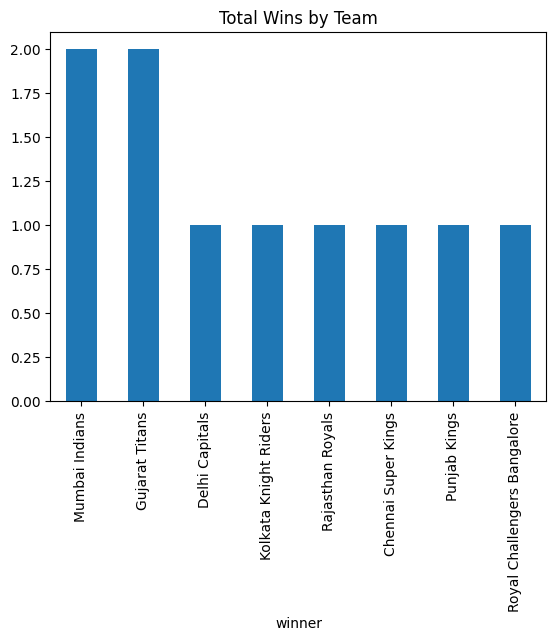

In [ ]:
import matplotlib.pyplot as plt

df['winner'].value_counts().plot(kind='bar', title='Total Wins by Team')
plt.show()

In [ ]:
top_players = df['player_of_match'].value_counts().head(5)
print(top_players)

# Players who won awards in winning matches
winning_players = df[df['player_of_match'] == df['winner']]

player_of_match
Rohit Sharma     1
Shubman Gill     1
Rishabh Pant     1
Sanju Samson     1
Hardik Pandya    1
Name: count, dtype: int64


In [ ]:
venue_stats = df.groupby('venue').agg({
    'total_runs': 'mean',
    'total_wickets': 'mean',
    'winner': 'count'
}).sort_values('total_runs', ascending=False)

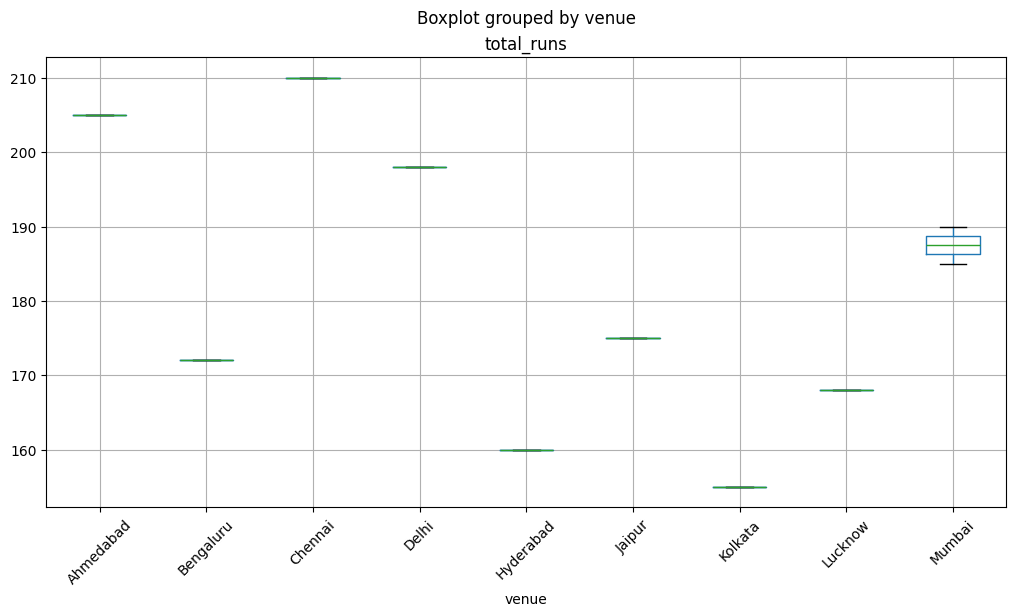

In [ ]:
df.boxplot(column='total_runs', by='venue', figsize=(12, 6))
plt.xticks(rotation=45)
plt.show()

In [ ]:
toss_win_ratio = (df['toss_winner'] == df['winner']).mean()
print(f"Toss winners won {toss_win_ratio:.0%} matches")

# Toss decision impact
bat_first_wins = df[df['toss_decision'] == 'bat']['winner'].value_counts()
field_first_wins = df[df['toss_decision'] == 'field']['winner'].value_counts()

Toss winners won 70% matches


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Feature engineering
df['is_home_team1'] = df['team1'] == df['venue'].map({
    'Mumbai': 'Mumbai Indians',
    'Bengaluru': 'Royal Challengers Bangalore',
    # Map other venues to teams
})

X = pd.get_dummies(df[['team1', 'team2', 'venue', 'toss_winner', 'toss_decision']])
y = df['winner']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model training
model = RandomForestClassifier()
model.fit(X_train, y_train)
print(f"Accuracy: {model.score(X_test, y_test):.2f}")

Accuracy: 0.00


In [ ]:
df['winner'].value_counts(normalize=True)

,proportion
winner,
Mumbai Indians,0.2
Gujarat Titans,0.2
Delhi Capitals,0.1
Kolkata Knight Riders,0.1
Rajasthan Royals,0.1
Chennai Super Kings,0.1
Punjab Kings,0.1
Royal Challengers Bangalore,0.1


In [ ]:
df.groupby('toss_decision')['winner'].count()

,winner
toss_decision,
bat,6
field,4
